<a href="https://colab.research.google.com/github/jennifercasandra/first-project/blob/main/world_plane_crash_Survival_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the necessary python libraries for this project

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
import pickle


In [ ]:
# Laoding the dataset
world_plane_dataset=pd.read_csv('/content/drive/MyDrive/Datasets/Plane Crashes.csv')
world_plane_dataset

,Date,Time,Aircraft,Operator,Registration,Flight phase,Flight type,Survivors,Crash site,Schedule,...,Country,Region,Crew on board,Crew fatalities,Pax on board,PAX fatalities,Other fatalities,Total fatalities,Circumstances,Crash cause
0,1918-05-02,NaN,De Havilland DH.4,United States Signal Corps - USSC,AS-32084,Takeoff (climb),Test,No,Airport (less than 10 km from airport),Dayton - Dayton,...,United States of America,North America,2.0,2.0,0.0,0.0,0.0,2,The single engine airplane departed Dayton-McC...,Technical failure
1,1918-06-08,NaN,Handley Page V/1500,Handley Page Aircraft Company Ltd,E4104,Takeoff (climb),Test,Yes,Airport (less than 10 km from airport),Cricklewood - Cricklewood,...,United Kingdom,Europe,6.0,5.0,0.0,0.0,0.0,5,"Assembled at Cricklewood Airfield in May 1918,...",Technical failure
2,1918-06-11,NaN,Avro 504,Royal Air Force - RAF,A8544,Flight,Training,Yes,"Plain, Valley",Abukir - Abukir,...,Egypt,Africa,2.0,1.0,0.0,0.0,0.0,1,The single engine aircraft was completing a lo...,Unknown
3,1918-06-19,NaN,De Havilland DH.4,United States Signal Corps - USSC,AS-32098,Flight,Military,No,Airport (less than 10 km from airport),Wright Patterson AFB-Wright Patterson AFB,...,United States of America,North America,1.0,1.0,0.0,0.0,0.0,1,"Lt. Frank Stuart Patterson, son and nephew of ...",Technical failure
4,1918-06-24,NaN,Breguet 14,French Air Force - Armée de l'Air,AS-4130,Landing (descent or approach),Military,Yes,NaN,NaN,...,France,Europe,NaN,0.0,NaN,0.0,0.0,0,The aircraft crashed iupon landing somewhere i...,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28531,2022-05-20,NaN,Embraer EMB-110 Bandeirante,Sales Serviços Aéreos,PT-SHN,Landing (descent or approach),Cargo,Yes,Airport (less than 10 km from airport),Jundiaí – Eldorado do Sul,...,Brazil,South America,2.0,0.0,0.0,0.0,0.0,0,The airplane departed Jundiaí on a cargo fligh...,Unknown
28532,2022-05-23,18H 29M 0S,Piper PA-61 Aerostar (Ted Smith 601),Raul Ignacion Posada,N66CG,Flight,Private,No,"Plain, Valley",Celaya - Durango,...,Mexico,Central America,1.0,1.0,1.0,1.0,0.0,2,While approaching Durango Airport on a flight ...,Unknown
28533,2022-05-24,15H 40M 0S,De Havilland DHC-3 Otter,Yakutat Coastal Airlines,N703TH,Landing (descent or approach),Charter/Taxi (Non Scheduled Revenue Flight),Yes,Airport (less than 10 km from airport),Yakutat – Dry Bay,...,United States of America,North America,1.0,0.0,3.0,0.0,0.0,0,The single engine airplane departed Yakutat on...,Unknown
28534,2022-05-29,10H 7M 0S,De Havilland DHC-6 Twin Otter,Tara Air,9N-AET,Flight,Scheduled Revenue Flight,No,Mountains,Pokhara – Jomsom,...,Nepal,Asia,3.0,3.0,19.0,19.0,0.0,22,The twin engine airplane departed Pokhara City...,Human factor


In [ ]:
# Let's check how many rows and columns are in the dataset
world_plane_dataset.shape

(28536, 24)

In [ ]:
# Let's check for the name of the columns in the dataset
world_plane_dataset.columns

Index(['Date', 'Time', 'Aircraft', 'Operator', 'Registration', 'Flight phase',
       'Flight type', 'Survivors', 'Crash site', 'Schedule', 'MSN', 'YOM',
       'Flight no.', 'Crash location', 'Country', 'Region', 'Crew on board',
       'Crew fatalities', 'Pax on board', 'PAX fatalities', 'Other fatalities',
       'Total fatalities', 'Circumstances', 'Crash cause'],
      dtype='object')

In [ ]:
# Let's visualize the first 10 rwms in the dataset
world_plane_dataset.head(10)

,Date,Time,Aircraft,Operator,Registration,Flight phase,Flight type,Survivors,Crash site,Schedule,...,Country,Region,Crew on board,Crew fatalities,Pax on board,PAX fatalities,Other fatalities,Total fatalities,Circumstances,Crash cause
0,1918-05-02,NaN,De Havilland DH.4,United States Signal Corps - USSC,AS-32084,Takeoff (climb),Test,No,Airport (less than 10 km from airport),Dayton - Dayton,...,United States of America,North America,2.0,2.0,0.0,0.0,0.0,2,The single engine airplane departed Dayton-McC...,Technical failure
1,1918-06-08,NaN,Handley Page V/1500,Handley Page Aircraft Company Ltd,E4104,Takeoff (climb),Test,Yes,Airport (less than 10 km from airport),Cricklewood - Cricklewood,...,United Kingdom,Europe,6.0,5.0,0.0,0.0,0.0,5,"Assembled at Cricklewood Airfield in May 1918,...",Technical failure
2,1918-06-11,NaN,Avro 504,Royal Air Force - RAF,A8544,Flight,Training,Yes,"Plain, Valley",Abukir - Abukir,...,Egypt,Africa,2.0,1.0,0.0,0.0,0.0,1,The single engine aircraft was completing a lo...,Unknown
3,1918-06-19,NaN,De Havilland DH.4,United States Signal Corps - USSC,AS-32098,Flight,Military,No,Airport (less than 10 km from airport),Wright Patterson AFB-Wright Patterson AFB,...,United States of America,North America,1.0,1.0,0.0,0.0,0.0,1,"Lt. Frank Stuart Patterson, son and nephew of ...",Technical failure
4,1918-06-24,NaN,Breguet 14,French Air Force - Armée de l'Air,AS-4130,Landing (descent or approach),Military,Yes,NaN,NaN,...,France,Europe,NaN,0.0,NaN,0.0,0.0,0,The aircraft crashed iupon landing somewhere i...,Unknown
5,1918-07-14,NaN,Fairey III,Marine Aeroplane Depot,N2851,Landing (descent or approach),Delivery,No,Airport (less than 10 km from airport),Isle of Grain - Usworth - Glasgow,...,United Kingdom,Europe,1.0,1.0,0.0,0.0,0.0,1,The pilot departed Isle of Grain on a delivery...,Unknown
6,1918-07-18,NaN,De Havilland DH.6,Royal Air Force - RAF,B3087,Flight,Training,No,Airport (less than 10 km from airport),Seaton Carew - Seaton Carew,...,United Kingdom,Europe,2.0,2.0,0.0,0.0,0.0,2,The crew was completing a local training fligh...,Unknown
7,1918-08-19,15H 15M 0S,Handley Page H.P.12,Royal Air Force - RAF,D4593,Flight,Test,No,"Plain, Valley",Castle Bromwich - Castle Bromwich,...,United Kingdom,Europe,2.0,2.0,5.0,5.0,0.0,7,The aircraft departed Castle Bromwich for a te...,Technical failure
8,1918-08-23,NaN,Tellier T.3,Portuguese Air Force - Aeronáutica Militar,5,Flight,Survey / Patrol / Reconnaissance,No,"Lake, Sea, Ocean, River",NaN,...,Portugal,Europe,2.0,2.0,0.0,0.0,0.0,2,The seaplane crashed in unknown circumstances ...,Unknown
9,1918-08-26,NaN,Blackburn R.T.1 Kangaroo,Royal Air Force - RAF,B9976,Landing (descent or approach),Military,Yes,Airport (less than 10 km from airport),Seaton Carew AFB - Seaton Carew AFB,...,United Kingdom,Europe,2.0,0.0,0.0,0.0,0.0,0,"On final approach in bad visibility, aircraft ...",Unknown


In [ ]:
# Extracting the year in the date column to a new column name year

#Before extract the year into a new column, we have to convert the date column to date time format
world_plane_dataset['Date'] = pd.to_datetime(world_plane_dataset['Date'])
world_plane_dataset['Year'] = world_plane_dataset['Date'].dt.year

In [ ]:
world_plane_dataset

,Date,Time,Aircraft,Operator,Registration,Flight phase,Flight type,Survivors,Crash site,Schedule,...,Region,Crew on board,Crew fatalities,Pax on board,PAX fatalities,Other fatalities,Total fatalities,Circumstances,Crash cause,Year
0,1918-05-02,NaN,De Havilland DH.4,United States Signal Corps - USSC,AS-32084,Takeoff (climb),Test,No,Airport (less than 10 km from airport),Dayton - Dayton,...,North America,2.0,2.0,0.0,0.0,0.0,2,The single engine airplane departed Dayton-McC...,Technical failure,1918
1,1918-06-08,NaN,Handley Page V/1500,Handley Page Aircraft Company Ltd,E4104,Takeoff (climb),Test,Yes,Airport (less than 10 km from airport),Cricklewood - Cricklewood,...,Europe,6.0,5.0,0.0,0.0,0.0,5,"Assembled at Cricklewood Airfield in May 1918,...",Technical failure,1918
2,1918-06-11,NaN,Avro 504,Royal Air Force - RAF,A8544,Flight,Training,Yes,"Plain, Valley",Abukir - Abukir,...,Africa,2.0,1.0,0.0,0.0,0.0,1,The single engine aircraft was completing a lo...,Unknown,1918
3,1918-06-19,NaN,De Havilland DH.4,United States Signal Corps - USSC,AS-32098,Flight,Military,No,Airport (less than 10 km from airport),Wright Patterson AFB-Wright Patterson AFB,...,North America,1.0,1.0,0.0,0.0,0.0,1,"Lt. Frank Stuart Patterson, son and nephew of ...",Technical failure,1918
4,1918-06-24,NaN,Breguet 14,French Air Force - Armée de l'Air,AS-4130,Landing (descent or approach),Military,Yes,NaN,NaN,...,Europe,NaN,0.0,NaN,0.0,0.0,0,The aircraft crashed iupon landing somewhere i...,Unknown,1918
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28531,2022-05-20,NaN,Embraer EMB-110 Bandeirante,Sales Serviços Aéreos,PT-SHN,Landing (descent or approach),Cargo,Yes,Airport (less than 10 km from airport),Jundiaí – Eldorado do Sul,...,South America,2.0,0.0,0.0,0.0,0.0,0,The airplane departed Jundiaí on a cargo fligh...,Unknown,2022
28532,2022-05-23,18H 29M 0S,Piper PA-61 Aerostar (Ted Smith 601),Raul Ignacion Posada,N66CG,Flight,Private,No,"Plain, Valley",Celaya - Durango,...,Central America,1.0,1.0,1.0,1.0,0.0,2,While approaching Durango Airport on a flight ...,Unknown,2022
28533,2022-05-24,15H 40M 0S,De Havilland DHC-3 Otter,Yakutat Coastal Airlines,N703TH,Landing (descent or approach),Charter/Taxi (Non Scheduled Revenue Flight),Yes,Airport (less than 10 km from airport),Yakutat – Dry Bay,...,North America,1.0,0.0,3.0,0.0,0.0,0,The single engine airplane departed Yakutat on...,Unknown,2022
28534,2022-05-29,10H 7M 0S,De Havilland DHC-6 Twin Otter,Tara Air,9N-AET,Flight,Scheduled Revenue Flight,No,Mountains,Pokhara – Jomsom,...,Asia,3.0,3.0,19.0,19.0,0.0,22,The twin engine airplane departed Pokhara City...,Human factor,2022


In [ ]:
# Making the new year column to appear immediately after the date column
world_plane_dataset.insert(1, 'year', world_plane_dataset['Year'])

# Drop the 'Year' column from its original position in th dataset
world_plane_dataset.drop(columns=['Year'], inplace=True)

In [ ]:
# confirm if the changes as been made
world_plane_dataset

,Date,year,Time,Aircraft,Operator,Registration,Flight phase,Flight type,Survivors,Crash site,...,Country,Region,Crew on board,Crew fatalities,Pax on board,PAX fatalities,Other fatalities,Total fatalities,Circumstances,Crash cause
0,1918-05-02,1918,NaN,De Havilland DH.4,United States Signal Corps - USSC,AS-32084,Takeoff (climb),Test,No,Airport (less than 10 km from airport),...,United States of America,North America,2.0,2.0,0.0,0.0,0.0,2,The single engine airplane departed Dayton-McC...,Technical failure
1,1918-06-08,1918,NaN,Handley Page V/1500,Handley Page Aircraft Company Ltd,E4104,Takeoff (climb),Test,Yes,Airport (less than 10 km from airport),...,United Kingdom,Europe,6.0,5.0,0.0,0.0,0.0,5,"Assembled at Cricklewood Airfield in May 1918,...",Technical failure
2,1918-06-11,1918,NaN,Avro 504,Royal Air Force - RAF,A8544,Flight,Training,Yes,"Plain, Valley",...,Egypt,Africa,2.0,1.0,0.0,0.0,0.0,1,The single engine aircraft was completing a lo...,Unknown
3,1918-06-19,1918,NaN,De Havilland DH.4,United States Signal Corps - USSC,AS-32098,Flight,Military,No,Airport (less than 10 km from airport),...,United States of America,North America,1.0,1.0,0.0,0.0,0.0,1,"Lt. Frank Stuart Patterson, son and nephew of ...",Technical failure
4,1918-06-24,1918,NaN,Breguet 14,French Air Force - Armée de l'Air,AS-4130,Landing (descent or approach),Military,Yes,NaN,...,France,Europe,NaN,0.0,NaN,0.0,0.0,0,The aircraft crashed iupon landing somewhere i...,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28531,2022-05-20,2022,NaN,Embraer EMB-110 Bandeirante,Sales Serviços Aéreos,PT-SHN,Landing (descent or approach),Cargo,Yes,Airport (less than 10 km from airport),...,Brazil,South America,2.0,0.0,0.0,0.0,0.0,0,The airplane departed Jundiaí on a cargo fligh...,Unknown
28532,2022-05-23,2022,18H 29M 0S,Piper PA-61 Aerostar (Ted Smith 601),Raul Ignacion Posada,N66CG,Flight,Private,No,"Plain, Valley",...,Mexico,Central America,1.0,1.0,1.0,1.0,0.0,2,While approaching Durango Airport on a flight ...,Unknown
28533,2022-05-24,2022,15H 40M 0S,De Havilland DHC-3 Otter,Yakutat Coastal Airlines,N703TH,Landing (descent or approach),Charter/Taxi (Non Scheduled Revenue Flight),Yes,Airport (less than 10 km from airport),...,United States of America,North America,1.0,0.0,3.0,0.0,0.0,0,The single engine airplane departed Yakutat on...,Unknown
28534,2022-05-29,2022,10H 7M 0S,De Havilland DHC-6 Twin Otter,Tara Air,9N-AET,Flight,Scheduled Revenue Flight,No,Mountains,...,Nepal,Asia,3.0,3.0,19.0,19.0,0.0,22,The twin engine airplane departed Pokhara City...,Human factor


Checking for Missing Values in the Entire Dataset

In [ ]:
world_plane_dataset.isnull().sum()

Date                    0
year                    0
Time                14587
Aircraft                1
Operator                0
Registration          815
Flight phase          638
Flight type            57
Survivors            1297
Crash site            383
Schedule             8946
MSN                  4182
YOM                  5311
Flight no.          28536
Crash location         12
Country                 1
Region                  1
Crew on board          24
Crew fatalities         1
Pax on board           54
PAX fatalities          1
Other fatalities       10
Total fatalities        0
Circumstances          25
Crash cause             0
dtype: int64

In [ ]:
# let's check for the sum of all the missing values in the dataset
world_plane_dataset.isnull().sum().sum()

64882

There are about 64,882 missing values in the dataset as displayed above. However we have to deal with this issue

In [ ]:
# To deal with the missing values, let's drops variables that are not really important from the dataframe
world_plane_dataset.drop(columns=['Date', 'Time', 'Pax on board','PAX fatalities','Other fatalities'], axis=1, inplace=True)


In [ ]:
world_plane_dataset

,year,Aircraft,Operator,Registration,Flight phase,Flight type,Survivors,Crash site,Schedule,MSN,YOM,Flight no.,Crash location,Country,Region,Crew on board,Crew fatalities,Total fatalities,Circumstances,Crash cause
0,1918,De Havilland DH.4,United States Signal Corps - USSC,AS-32084,Takeoff (climb),Test,No,Airport (less than 10 km from airport),Dayton - Dayton,NaN,NaN,NaN,Dayton-McCook Field Ohio,United States of America,North America,2.0,2.0,2,The single engine airplane departed Dayton-McC...,Technical failure
1,1918,Handley Page V/1500,Handley Page Aircraft Company Ltd,E4104,Takeoff (climb),Test,Yes,Airport (less than 10 km from airport),Cricklewood - Cricklewood,NaN,1918.0,NaN,Cricklewood London Metropolis,United Kingdom,Europe,6.0,5.0,5,"Assembled at Cricklewood Airfield in May 1918,...",Technical failure
2,1918,Avro 504,Royal Air Force - RAF,A8544,Flight,Training,Yes,"Plain, Valley",Abukir - Abukir,NaN,NaN,NaN,Abukir (Abu Qir) Alexandria,Egypt,Africa,2.0,1.0,1,The single engine aircraft was completing a lo...,Unknown
3,1918,De Havilland DH.4,United States Signal Corps - USSC,AS-32098,Flight,Military,No,Airport (less than 10 km from airport),Wright Patterson AFB-Wright Patterson AFB,NaN,NaN,NaN,Wright-Patterson AFB (Dayton) Ohio,United States of America,North America,1.0,1.0,1,"Lt. Frank Stuart Patterson, son and nephew of ...",Technical failure
4,1918,Breguet 14,French Air Force - Armée de l'Air,AS-4130,Landing (descent or approach),Military,Yes,NaN,NaN,NaN,NaN,NaN,France All France,France,Europe,NaN,0.0,0,The aircraft crashed iupon landing somewhere i...,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28531,2022,Embraer EMB-110 Bandeirante,Sales Serviços Aéreos,PT-SHN,Landing (descent or approach),Cargo,Yes,Airport (less than 10 km from airport),Jundiaí – Eldorado do Sul,110-460,1985.0,NaN,Eldorado do Sul Rio Grande do Sul,Brazil,South America,2.0,0.0,0,The airplane departed Jundiaí on a cargo fligh...,Unknown
28532,2022,Piper PA-61 Aerostar (Ted Smith 601),Raul Ignacion Posada,N66CG,Flight,Private,No,"Plain, Valley",Celaya - Durango,61-0277-061,1976.0,NaN,Durango Durango,Mexico,Central America,1.0,1.0,2,While approaching Durango Airport on a flight ...,Unknown
28533,2022,De Havilland DHC-3 Otter,Yakutat Coastal Airlines,N703TH,Landing (descent or approach),Charter/Taxi (Non Scheduled Revenue Flight),Yes,Airport (less than 10 km from airport),Yakutat – Dry Bay,456,1965.0,NaN,Dry Bay Alaska,United States of America,North America,1.0,0.0,0,The single engine airplane departed Yakutat on...,Unknown
28534,2022,De Havilland DHC-6 Twin Otter,Tara Air,9N-AET,Flight,Scheduled Revenue Flight,No,Mountains,Pokhara – Jomsom,619,1979.0,NaN,Shikha Dhawalagiri,Nepal,Asia,3.0,3.0,22,The twin engine airplane departed Pokhara City...,Human factor


In [ ]:
# To deal with the missing values, let's drops the remaining variables that are not really important from the dataframe
world_plane_dataset.drop(columns=['Schedule', 'MSN', 'YOM'], axis=1, inplace=True)

In [ ]:
world_plane_dataset

,year,Aircraft,Operator,Registration,Flight phase,Flight type,Survivors,Crash site,Flight no.,Crash location,Country,Region,Crew on board,Crew fatalities,Total fatalities,Circumstances,Crash cause
0,1918,De Havilland DH.4,United States Signal Corps - USSC,AS-32084,Takeoff (climb),Test,No,Airport (less than 10 km from airport),NaN,Dayton-McCook Field Ohio,United States of America,North America,2.0,2.0,2,The single engine airplane departed Dayton-McC...,Technical failure
1,1918,Handley Page V/1500,Handley Page Aircraft Company Ltd,E4104,Takeoff (climb),Test,Yes,Airport (less than 10 km from airport),NaN,Cricklewood London Metropolis,United Kingdom,Europe,6.0,5.0,5,"Assembled at Cricklewood Airfield in May 1918,...",Technical failure
2,1918,Avro 504,Royal Air Force - RAF,A8544,Flight,Training,Yes,"Plain, Valley",NaN,Abukir (Abu Qir) Alexandria,Egypt,Africa,2.0,1.0,1,The single engine aircraft was completing a lo...,Unknown
3,1918,De Havilland DH.4,United States Signal Corps - USSC,AS-32098,Flight,Military,No,Airport (less than 10 km from airport),NaN,Wright-Patterson AFB (Dayton) Ohio,United States of America,North America,1.0,1.0,1,"Lt. Frank Stuart Patterson, son and nephew of ...",Technical failure
4,1918,Breguet 14,French Air Force - Armée de l'Air,AS-4130,Landing (descent or approach),Military,Yes,NaN,NaN,France All France,France,Europe,NaN,0.0,0,The aircraft crashed iupon landing somewhere i...,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28531,2022,Embraer EMB-110 Bandeirante,Sales Serviços Aéreos,PT-SHN,Landing (descent or approach),Cargo,Yes,Airport (less than 10 km from airport),NaN,Eldorado do Sul Rio Grande do Sul,Brazil,South America,2.0,0.0,0,The airplane departed Jundiaí on a cargo fligh...,Unknown
28532,2022,Piper PA-61 Aerostar (Ted Smith 601),Raul Ignacion Posada,N66CG,Flight,Private,No,"Plain, Valley",NaN,Durango Durango,Mexico,Central America,1.0,1.0,2,While approaching Durango Airport on a flight ...,Unknown
28533,2022,De Havilland DHC-3 Otter,Yakutat Coastal Airlines,N703TH,Landing (descent or approach),Charter/Taxi (Non Scheduled Revenue Flight),Yes,Airport (less than 10 km from airport),NaN,Dry Bay Alaska,United States of America,North America,1.0,0.0,0,The single engine airplane departed Yakutat on...,Unknown
28534,2022,De Havilland DHC-6 Twin Otter,Tara Air,9N-AET,Flight,Scheduled Revenue Flight,No,Mountains,NaN,Shikha Dhawalagiri,Nepal,Asia,3.0,3.0,22,The twin engine airplane departed Pokhara City...,Human factor


In [ ]:
# Now, since we have successfully dropped some columns which are not important for our  prediction and analysis, let's check for
# How many missing values are still remaing in the dataframe
world_plane_dataset.isnull().sum().sum()

31791

In [ ]:
# Let's check for the columns that are having these missing values
world_plane_dataset.isna().sum()

year                    0
Aircraft                1
Operator                0
Registration          815
Flight phase          638
Flight type            57
Survivors            1297
Crash site            383
Flight no.          28536
Crash location         12
Country                 1
Region                  1
Crew on board          24
Crew fatalities         1
Total fatalities        0
Circumstances          25
Crash cause             0
dtype: int64

Exploratory Data Analysis

In [ ]:
world_plane_dataset.groupby('Survivors')['Survivors'].count()

Survivors
No     11711
Yes    15528
Name: Survivors, dtype: int64

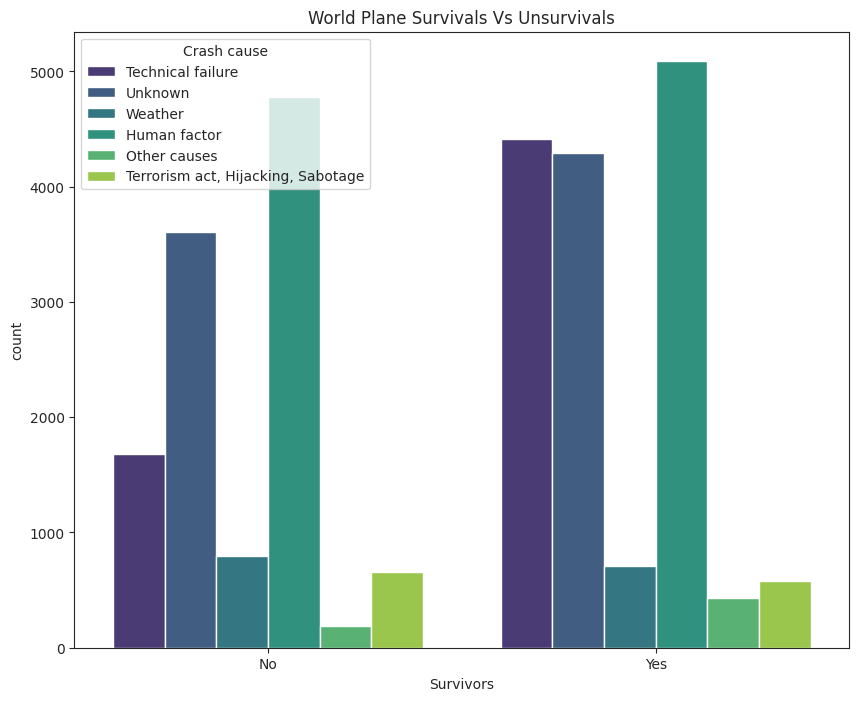

In [ ]:
fig_1 = plt.figure(figsize=(10,8), dpi=100)
sns.set_style('ticks')
sns.countplot(x='Survivors', data=world_plane_dataset, width=0.8, palette='viridis', hue='Crash cause')
plt.title('World Plane Survivals Vs Unsurvivals')
plt.show()

**Carrying Out Analysis on the Crash Cause Variable**

In [ ]:
world_plane_dataset.groupby('Crash cause')['Crash cause'].count()

Crash cause
Human factor                          9926
Other causes                           627
Technical failure                     6203
Terrorism act, Hijacking, Sabotage    1263
Unknown                               8989
Weather                               1528
Name: Crash cause, dtype: int64

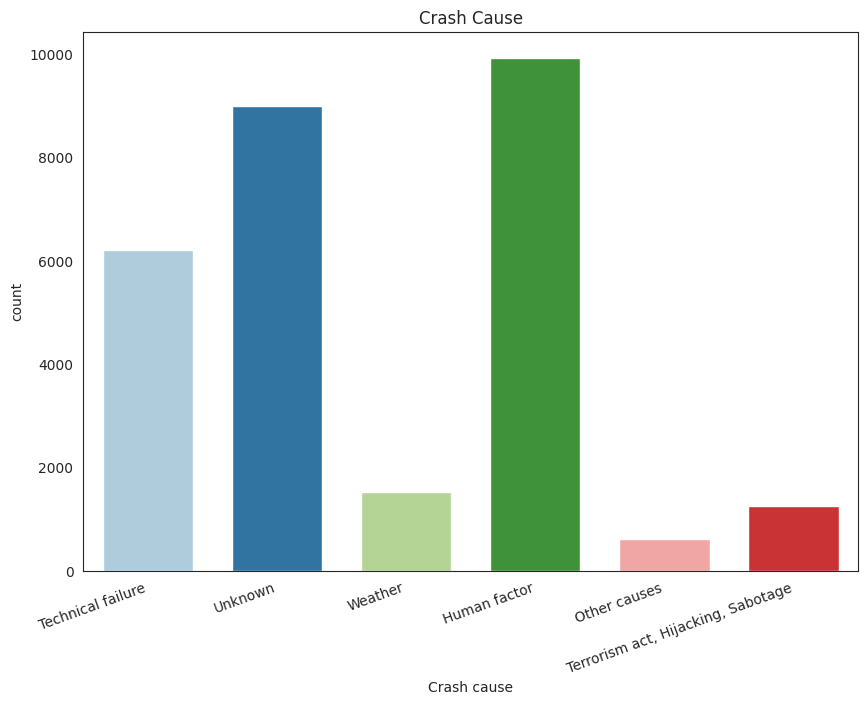

In [ ]:
plt.figure(figsize=(10,7), dpi=100)
sns.set_style('white')
sns.countplot(x='Crash cause', data=world_plane_dataset, width=0.7, palette='Paired', hue='Crash cause')
plt.title('Crash Cause')
plt.xticks(rotation=20, ha='right')
plt.show()

**Chart Analysis**

As we can clearly see in the chart shown above, the major cause of plane crashes in the world from the year 1918 to 2022 is Human factor while the second is an unknown factor.

**Carrying Out Analysis on the Year Variable**

In [ ]:
# Let's select the year coulmn in the dataframe
world_plane_dataset.groupby('year')['year'].value_counts()

year
1918     25
1919     83
1920    127
1921    138
1922    106
       ... 
2018    131
2019    145
2020    113
2021    113
2022     39
Name: count, Length: 105, dtype: int64

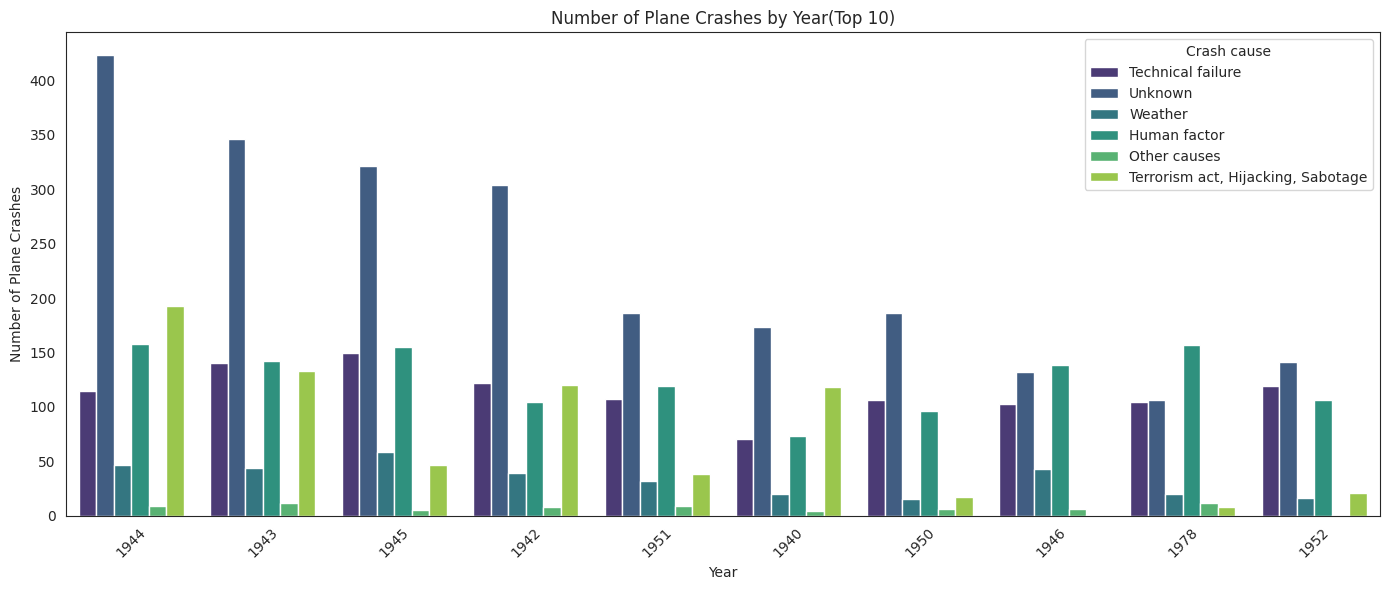

In [ ]:
# Let's visualize the year with the heighest number of plane crash crashes all over the world from 1918-2022
# we will choose countplot() for the task because the year variable is a categorical variable
plt.figure(figsize=(14, 6))
sns.set_style('white')
sns.countplot(x='year', data=world_plane_dataset, palette='viridis', order=world_plane_dataset['year'].value_counts().index[:10],hue='Crash cause', width=0.8)
plt.xlabel('Year')
plt.ylabel('Number of Plane Crashes')
plt.title('Number of Plane Crashes by Year(Top 10)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Analysis the Chart**

The countplot shown above depicts plane crashes years all over the world from 1918 to 2022. From our analysis, we discovered that the year 1944 experienced the heighest plane crashes all over the world. The common cause was the human error. The chart above explains better.

**Carrying Out Analysis on the Flight Type variable**

In [ ]:
# Let's check for the distincts flight type in the dataset
world_plane_dataset['Flight type'].value_counts()

Flight type
Scheduled Revenue Flight                       6035
Military                                       4649
Training                                       3300
Cargo                                          2814
Private                                        2344
Charter/Taxi (Non Scheduled Revenue Flight)    1830
Executive/Corporate/Business                   1050
Survey / Patrol / Reconnaissance                896
Bombing                                         672
Positioning                                     671
Test                                            565
Spraying (Agricultural)                         501
Postal (mail)                                   494
Ferry                                           426
Supply                                          415
Government                                      246
Ambulance                                       228
Illegal (smuggling)                             225
Delivery                                        192


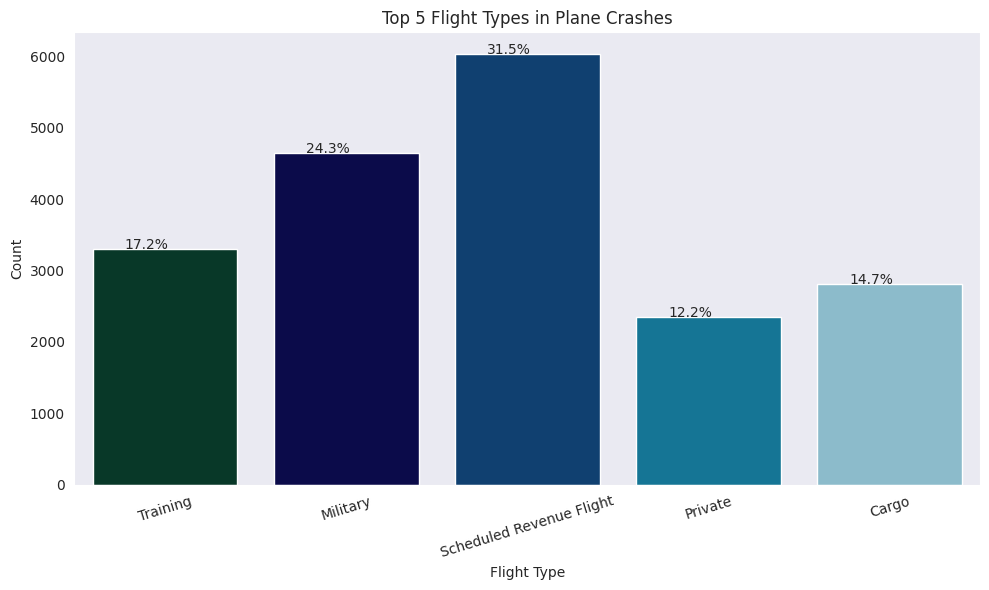

In [ ]:
# Let's visualize the top ten occured flight type
sns.set_style('dark')

top_flight_types = world_plane_dataset['Flight type'].value_counts().index[:5]
# Filter the DataFrame to include only the top 5 flight types
df_top = world_plane_dataset[world_plane_dataset['Flight type'].isin(top_flight_types)]

plt.figure(figsize=(10, 6))
ax=sns.countplot(x='Flight type', data=df_top, palette='ocean', hue='Flight type')

total = len(df_top)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center')

plt.xlabel('Flight Type')
plt.ylabel('Count')
plt.title('Top 5 Flight Types in Plane Crashes')
plt.xticks(rotation=17)
plt.tight_layout()
plt.show()

**Analysis the Chart**

The chart above depicts the five top most requently used flight types in the dataset. The most frequently used flight type in the dataset is the Scheduled Revenue Flight seconded by the military flight type

**Bivariate Analysis**

Let's classify countries by regions

In [ ]:
world_plane_dataset.groupby('Region')['Country'].count()

Region
Africa             2088
Antarctica           57
Asia               5702
Central America    1310
Europe             6694
North America      8193
Oceania            1311
South America      2580
World               600
Name: Country, dtype: int64

We can see that North American as the highest plane crahses all over the world

In [ ]:
# Let's filter all the countrie within the Africa region
africa_countries =world_plane_dataset[world_plane_dataset['Region'] == 'Africa']['Country'].unique()

# Print the list of countries in Africa region
print(africa_countries)

['Egypt' 'Sudan' 'South Africa' 'Tanzania' 'Zimbabwe' 'Morocco' 'Niger'
 'Mauritania' 'Algeria' 'Western Sahara' 'Kenya' 'Senegal' 'Tunisia'
 'Zambia' 'Democratic Republic of Congo' 'South Sudan' 'Libya' 'Mali'
 'Guinea Bissau' 'Madagascar' 'Ethiopia' 'Namibia' 'Benin' 'Uganda'
 'Gambia' 'Nigeria' 'Chad' 'Mozambique' 'Djibouti' 'Guinea' 'Sierra Leone'
 'Central African Republic' 'Eritrea' 'Ghana' 'Liberia' 'Ivory Coast'
 'Cameroon' 'Somalia' 'Congo' 'Burkina Faso' 'Angola' 'Malawi' 'Lesotho'
 'Cabo Verde' 'Mauritius' 'Equatorial Guinea' 'Gabon'
 'São Tomé and Principe' 'Comoros Islands' 'La Reunion' 'Botswana' 'Togo'
 'Mayotte' 'Rwanda' 'Swaziland']


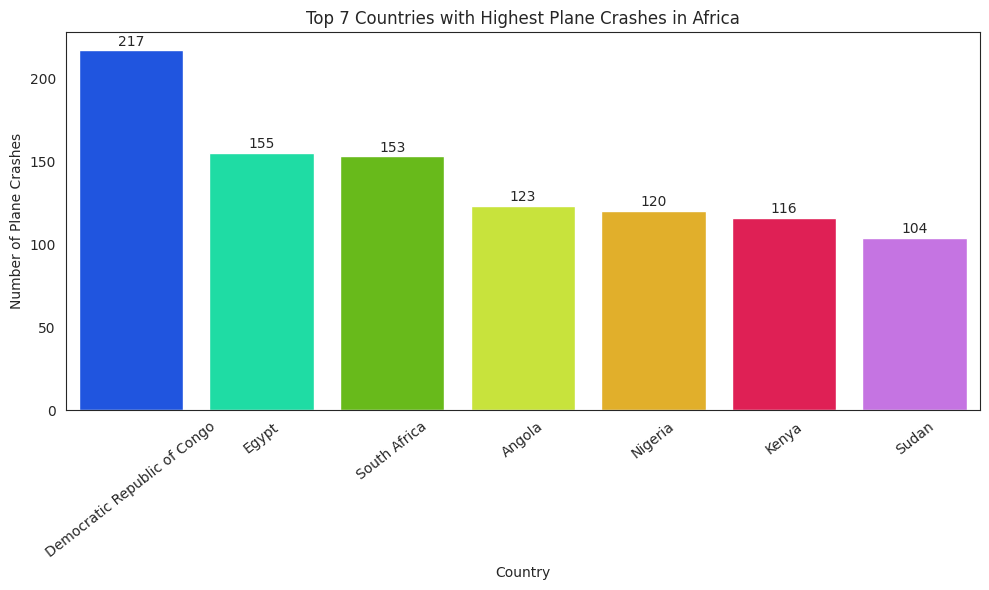

In [ ]:
# Filter the dataset to include only countries in Africa region
africa_df = world_plane_dataset[world_plane_dataset['Region'] == 'Africa']

# Group the data by country and count the number of plane crashes
country_crashes = africa_df['Country'].value_counts()

# Select the top 7 countries with the highest number of plane crashes
top_countries = country_crashes.head(7)
plt.figure(figsize=(10, 6))
sns.set_style('white')
sns.barplot(x=top_countries.index, y=top_countries.values, palette='gist_ncar', hue=top_countries.index)

for index, value in enumerate(top_countries):
    plt.text(index, value + 1, str(value), ha='center', va='bottom', fontsize=10)

plt.xlabel('Country')
plt.ylabel('Number of Plane Crashes')
plt.title('Top 7 Countries with Highest Plane Crashes in Africa')

plt.xticks(rotation=38)

plt.tight_layout()
plt.show()

The chart above shows that the Democratic Repulic of Congo within the Africa region is the country with the highest planes crashes from 1918-2022 seconded by Egypt and South Africa.

Note: The chart visualize the first seven countries within the Africa Region with the highest plane crashes from 1918 -2022

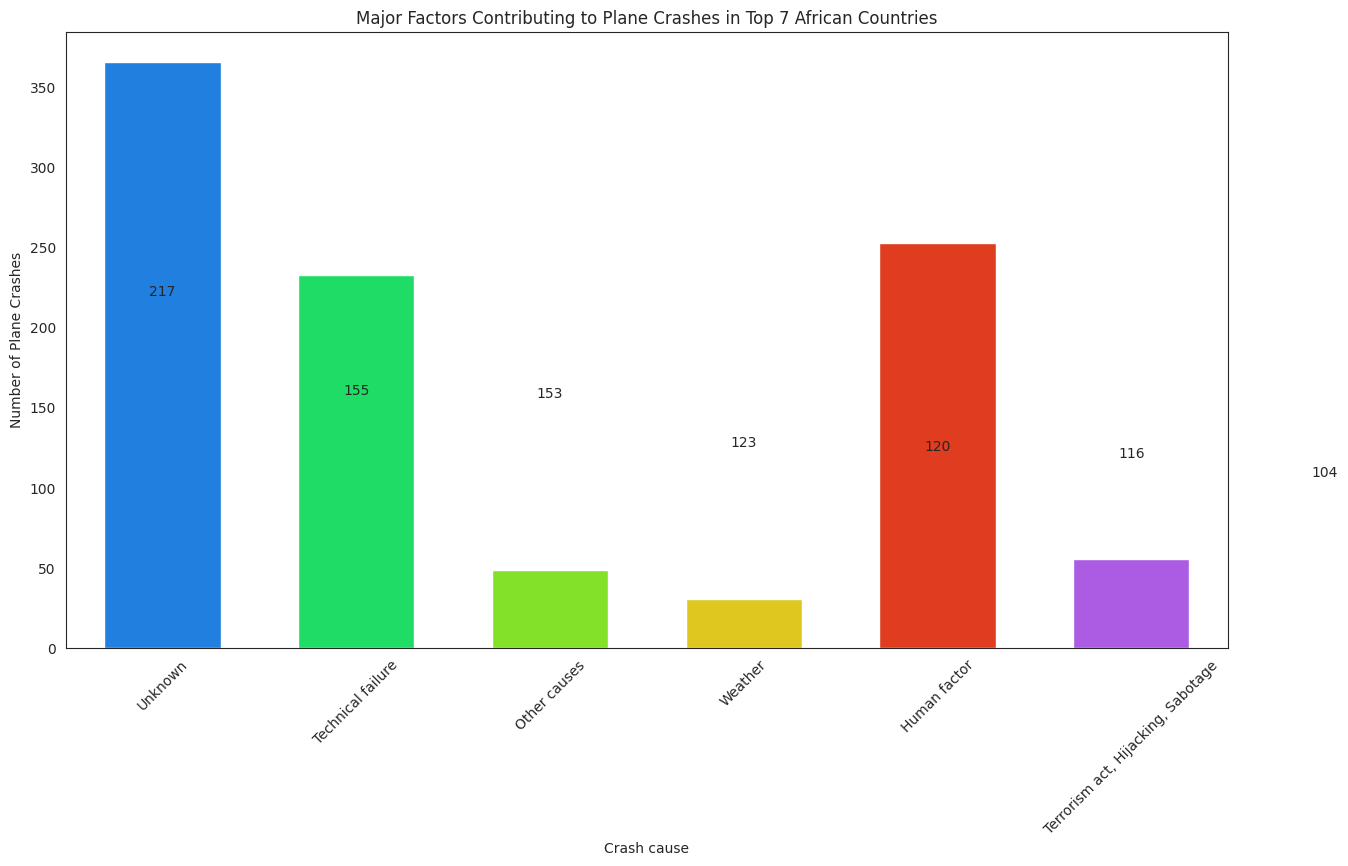

In [ ]:
# let's check what was the common factor that contributed to the crashes in these seven conutries in Africa
# Filter the dataset to include only countries in Africa region
africa_df = world_plane_dataset[world_plane_dataset['Region'] == 'Africa']
country_crashes = africa_df['Country'].value_counts()
top_countries = country_crashes.head(7)
top_countries_df = africa_df[africa_df['Country'].isin(top_countries.index)]

plt.figure(figsize=(15, 8))
sns.countplot(x='Crash cause', data=top_countries_df, palette='gist_ncar', hue='Crash cause', width=0.6)

for index, value in enumerate(top_countries):
    plt.text(index, value + 1, str(value), ha='center', va='bottom', fontsize=10)

plt.xlabel('Crash cause')
plt.ylabel('Number of Plane Crashes')
plt.title('Major Factors Contributing to Plane Crashes in Top 7 African Countries')

plt.xticks(rotation=45)

plt.show()

# FEATURE ENGINEERING
### Feature Selection

Since most of the variables are not important, we will drop them and Select those that will significantly aid the model to achieve optimal result thereby preventing the model from overfitting.


In [ ]:
# Let's delete columns that are not important out
world_plane_dataset.drop(columns = ["year", "Flight type", "Crash site", "Crash location", "Country", "Region", "Crew on board"], inplace = True)
# Viewing the datafrma to see the remaining variables
world_plane_dataset

,Aircraft,Operator,Registration,Flight phase,Survivors,Flight no.,Crew fatalities,Total fatalities,Circumstances,Crash cause
0,De Havilland DH.4,United States Signal Corps - USSC,AS-32084,Takeoff (climb),No,NaN,2.0,2,The single engine airplane departed Dayton-McC...,Technical failure
1,Handley Page V/1500,Handley Page Aircraft Company Ltd,E4104,Takeoff (climb),Yes,NaN,5.0,5,"Assembled at Cricklewood Airfield in May 1918,...",Technical failure
2,Avro 504,Royal Air Force - RAF,A8544,Flight,Yes,NaN,1.0,1,The single engine aircraft was completing a lo...,Unknown
3,De Havilland DH.4,United States Signal Corps - USSC,AS-32098,Flight,No,NaN,1.0,1,"Lt. Frank Stuart Patterson, son and nephew of ...",Technical failure
4,Breguet 14,French Air Force - Armée de l'Air,AS-4130,Landing (descent or approach),Yes,NaN,0.0,0,The aircraft crashed iupon landing somewhere i...,Unknown
...,...,...,...,...,...,...,...,...,...,...
28531,Embraer EMB-110 Bandeirante,Sales Serviços Aéreos,PT-SHN,Landing (descent or approach),Yes,NaN,0.0,0,The airplane departed Jundiaí on a cargo fligh...,Unknown
28532,Piper PA-61 Aerostar (Ted Smith 601),Raul Ignacion Posada,N66CG,Flight,No,NaN,1.0,2,While approaching Durango Airport on a flight ...,Unknown
28533,De Havilland DHC-3 Otter,Yakutat Coastal Airlines,N703TH,Landing (descent or approach),Yes,NaN,0.0,0,The single engine airplane departed Yakutat on...,Unknown
28534,De Havilland DHC-6 Twin Otter,Tara Air,9N-AET,Flight,No,NaN,3.0,22,The twin engine airplane departed Pokhara City...,Human factor


In [ ]:
# Let's reorder the columns so that the target variable will appear as the last columns
cols =list(world_plane_dataset.columns)
cols.remove('Survivors')
cols.append('Survivors')
world_plane_dataset=world_plane_dataset.reindex(columns=cols)

In [ ]:
world_plane_dataset
#

,Aircraft,Operator,Registration,Flight phase,Flight no.,Crew fatalities,Total fatalities,Circumstances,Crash cause,Survivors
0,De Havilland DH.4,United States Signal Corps - USSC,AS-32084,Takeoff (climb),NaN,2.0,2,The single engine airplane departed Dayton-McC...,Technical failure,No
1,Handley Page V/1500,Handley Page Aircraft Company Ltd,E4104,Takeoff (climb),NaN,5.0,5,"Assembled at Cricklewood Airfield in May 1918,...",Technical failure,Yes
2,Avro 504,Royal Air Force - RAF,A8544,Flight,NaN,1.0,1,The single engine aircraft was completing a lo...,Unknown,Yes
3,De Havilland DH.4,United States Signal Corps - USSC,AS-32098,Flight,NaN,1.0,1,"Lt. Frank Stuart Patterson, son and nephew of ...",Technical failure,No
4,Breguet 14,French Air Force - Armée de l'Air,AS-4130,Landing (descent or approach),NaN,0.0,0,The aircraft crashed iupon landing somewhere i...,Unknown,Yes
...,...,...,...,...,...,...,...,...,...,...
28531,Embraer EMB-110 Bandeirante,Sales Serviços Aéreos,PT-SHN,Landing (descent or approach),NaN,0.0,0,The airplane departed Jundiaí on a cargo fligh...,Unknown,Yes
28532,Piper PA-61 Aerostar (Ted Smith 601),Raul Ignacion Posada,N66CG,Flight,NaN,1.0,2,While approaching Durango Airport on a flight ...,Unknown,No
28533,De Havilland DHC-3 Otter,Yakutat Coastal Airlines,N703TH,Landing (descent or approach),NaN,0.0,0,The single engine airplane departed Yakutat on...,Unknown,Yes
28534,De Havilland DHC-6 Twin Otter,Tara Air,9N-AET,Flight,NaN,3.0,22,The twin engine airplane departed Pokhara City...,Human factor,No


In [ ]:
# It loks like there are still some columns to drop. Let's delete them
world_plane_dataset.drop(columns = [ "Registration",  "Flight no.", "Crew fatalities", "Total fatalities"], inplace = True)

In [ ]:
world_plane_dataset

,Aircraft,Operator,Flight phase,Circumstances,Crash cause,Survivors
0,De Havilland DH.4,United States Signal Corps - USSC,Takeoff (climb),The single engine airplane departed Dayton-McC...,Technical failure,No
1,Handley Page V/1500,Handley Page Aircraft Company Ltd,Takeoff (climb),"Assembled at Cricklewood Airfield in May 1918,...",Technical failure,Yes
2,Avro 504,Royal Air Force - RAF,Flight,The single engine aircraft was completing a lo...,Unknown,Yes
3,De Havilland DH.4,United States Signal Corps - USSC,Flight,"Lt. Frank Stuart Patterson, son and nephew of ...",Technical failure,No
4,Breguet 14,French Air Force - Armée de l'Air,Landing (descent or approach),The aircraft crashed iupon landing somewhere i...,Unknown,Yes
...,...,...,...,...,...,...
28531,Embraer EMB-110 Bandeirante,Sales Serviços Aéreos,Landing (descent or approach),The airplane departed Jundiaí on a cargo fligh...,Unknown,Yes
28532,Piper PA-61 Aerostar (Ted Smith 601),Raul Ignacion Posada,Flight,While approaching Durango Airport on a flight ...,Unknown,No
28533,De Havilland DHC-3 Otter,Yakutat Coastal Airlines,Landing (descent or approach),The single engine airplane departed Yakutat on...,Unknown,Yes
28534,De Havilland DHC-6 Twin Otter,Tara Air,Flight,The twin engine airplane departed Pokhara City...,Human factor,No


In [ ]:
# Now let's convert the target variable to binary value 0: for No and 1: for yes
label_encoder = LabelEncoder()
binary_target = label_encoder.fit_transform(world_plane_dataset['Survivors'])
world_plane_dataset['Survivors']= binary_target


In [ ]:
world_plane_dataset

,Aircraft,Operator,Flight phase,Circumstances,Crash cause,Survivors
0,De Havilland DH.4,United States Signal Corps - USSC,Takeoff (climb),The single engine airplane departed Dayton-McC...,Technical failure,0
1,Handley Page V/1500,Handley Page Aircraft Company Ltd,Takeoff (climb),"Assembled at Cricklewood Airfield in May 1918,...",Technical failure,1
2,Avro 504,Royal Air Force - RAF,Flight,The single engine aircraft was completing a lo...,Unknown,1
3,De Havilland DH.4,United States Signal Corps - USSC,Flight,"Lt. Frank Stuart Patterson, son and nephew of ...",Technical failure,0
4,Breguet 14,French Air Force - Armée de l'Air,Landing (descent or approach),The aircraft crashed iupon landing somewhere i...,Unknown,1
...,...,...,...,...,...,...
28531,Embraer EMB-110 Bandeirante,Sales Serviços Aéreos,Landing (descent or approach),The airplane departed Jundiaí on a cargo fligh...,Unknown,1
28532,Piper PA-61 Aerostar (Ted Smith 601),Raul Ignacion Posada,Flight,While approaching Durango Airport on a flight ...,Unknown,0
28533,De Havilland DHC-3 Otter,Yakutat Coastal Airlines,Landing (descent or approach),The single engine airplane departed Yakutat on...,Unknown,1
28534,De Havilland DHC-6 Twin Otter,Tara Air,Flight,The twin engine airplane departed Pokhara City...,Human factor,0


In [ ]:
world_plane_dataset.dropna(inplace = True)

In [ ]:
# Now the next thing is to convert the independent variables to numerical values
processing = [("processing_1", Pipeline([("TfidVectorizer", TfidfVectorizer())]),"Aircraft"),
                 ("processing_2", Pipeline([("TfidVectorizer", TfidfVectorizer())]), "Operator"),
                 ("processing_3", Pipeline([("TfidVectorizer", TfidfVectorizer())]), "Flight phase"),
                ("processing_4", Pipeline([("TfidVectorizer", TfidfVectorizer())]), "Circumstances"),
                ("processing_5", Pipeline([("Tfidvectorizer", TfidfVectorizer())]), "Crash cause")]

In [ ]:
preprocessor = ColumnTransformer(transformers = processing)

In [ ]:
pipeline = Pipeline(steps = [("preprocessor", preprocessor), ("classifier", XGBClassifier())])

In [ ]:
# Now let's put the target variable into a variable, y and the predictors in x
x = world_plane_dataset[world_plane_dataset.columns[:-1]]
y = world_plane_dataset[world_plane_dataset.columns[-1]]

In [ ]:
print(x)

                                   Aircraft  \
0                         De Havilland DH.4   
1                       Handley Page V/1500   
2                                  Avro 504   
3                         De Havilland DH.4   
4                                Breguet 14   
...                                     ...   
28531           Embraer EMB-110 Bandeirante   
28532  Piper PA-61 Aerostar (Ted Smith 601)   
28533              De Havilland DHC-3 Otter   
28534         De Havilland DHC-6 Twin Otter   
28535             Cessna 208B Grand Caravan   

                                Operator                   Flight phase  \
0      United States Signal Corps - USSC                Takeoff (climb)   
1      Handley Page Aircraft Company Ltd                Takeoff (climb)   
2                  Royal Air Force - RAF                         Flight   
3      United States Signal Corps - USSC                         Flight   
4      French Air Force - Armée de l'Air  Landing (descent o

In [ ]:
print(y)

0        0
1        1
2        1
3        0
4        1
        ..
28531    1
28532    0
28533    1
28534    0
28535    1
Name: Survivors, Length: 27878, dtype: int64


In [ ]:
# let's split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [ ]:
# Now, train our XGBOOST Model for Prediction
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('processing_1',
                                                  Pipeline(steps=[('TfidVectorizer',
                                                                   TfidfVectorizer())]),
                                                  'Aircraft'),
                                                 ('processing_2',
                                                  Pipeline(steps=[('TfidVectorizer',
                                                                   TfidfVectorizer())]),
                                                  'Operator'),
                                                 ('processing_3',
                                                  Pipeline(steps=[('TfidVectorizer',
                                                                   TfidfVectorizer())]),
                                                  'Flight phase'),
                                                 ('processing_4',
                                                  Pipeline(steps=[('...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None,
                               objective='multi:softprob', ...))])

In [ ]:
# let's use the model to predict the train data
y_pred = pipeline.predict(X_train)
y_pred

array([1, 1, 0, ..., 1, 0, 1])

In [ ]:
# Let's  use the classification report to evaluate the model performance on the training dataset
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      9383
           1       1.00      0.99      1.00     12211
           2       0.99      1.00      0.99       708

    accuracy                           0.99     22302
   macro avg       0.99      1.00      0.99     22302
weighted avg       0.99      0.99      0.99     22302



In [ ]:
# Let's  use the classification report to evaluate the model performance on the test dataset
y_pred = pipeline.predict(X_test)
y_pred

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.94      0.96      0.95      2312
           1       0.97      0.96      0.96      3088
           2       0.97      0.94      0.95       176

    accuracy                           0.96      5576
   macro avg       0.96      0.95      0.96      5576
weighted avg       0.96      0.96      0.96      5576



In [ ]:
data = {
    "Aircraft" : "De Havilland DHC-3 Otter",
    "Operator" : "Yakutat Coastal Airlines",
    "Flight phase" : "Landing (descent or approach)",
    "Circumstances" : "The single engine airplane departed Yakutat on an on-demand flight to Dry Bay, a remote airstrip located about 30 miles southeast of the Southeast Alaska community of Yakutat. On final approach, the aircraft crashed in a wooded area located short of runway. All four occupants were injured, three critically.",
    "Crash cause" : "Unknown"
}

data = pd.DataFrame(data, columns=["Aircraft", "Operator", "Flight phase", "Circumstances", "Crash cause"], index = [0])

# Create a ColumnTransformer to handle different column types
processing_1 = [("processing_1", Pipeline([("TfidVectorizer", TfidfVectorizer())]),"Aircraft"),
                 ("processing_2", Pipeline([("TfidVectorizer", TfidfVectorizer())]), "Operator"),
                 ("processing_3", Pipeline([("TfidVectorizer", TfidfVectorizer())]), "Flight phase"),
                ("processing_4", Pipeline([("TfidVectorizer", TfidfVectorizer())]), "Circumstances"),
                ("processing_5", Pipeline([("Tfidvectorizer", TfidfVectorizer())]), "Crash cause")]

ct = ColumnTransformer(transformers = processing_1)

# Create a pipeline that combines the ColumnTransformer and a XGBclassifier model
pipeline = Pipeline([
        ('prep', ct),
        ('model', XGBClassifier())
    ])

# Fit the pipeline on the training data
# Note: This assumes that the training data is available in a separate variable called "training_data"

# Predict the outcome for the new data point
pipeline.fit(X_train, y_train)
prediction = pipeline.predict(data)

# Print the prediction
print(prediction)

if(prediction== 0):
  print("There are no survivors")
else:
  print("There are survivors")

print()
print()


[1]
There are survivors




In [ ]:
# Exporting the model for deployment


# Saving the model into a pickle file
with open('model.sav', 'wb') as file:
  pickle.dump(pipeline, file)

In [ ]:
load_model= pickle.load(open('train_model.sav', 'rb'))

In [ ]:
data = {
    "Aircraft" : "De Havilland DHC-3 Otter",
    "Operator" : "Yakutat Coastal Airlines",
    "Flight phase" : "Landing (descent or approach)",
    "Circumstances" : "The single engine airplane departed Yakutat on an on-demand flight to Dry Bay, a remote airstrip located about 30 miles southeast of the Southeast Alaska community of Yakutat. On final approach, the aircraft crashed in a wooded area located short of runway. All four occupants were injured, three critically.",
    "Crash cause" : "Unknown"
}

data = pd.DataFrame(data, columns=["Aircraft", "Operator", "Flight phase", "Circumstances", "Crash cause"], index = [0])

# Create a ColumnTransformer to handle different column types
processing_1 = [("processing_1", Pipeline([("TfidVectorizer", TfidfVectorizer())]),"Aircraft"),
                 ("processing_2", Pipeline([("TfidVectorizer", TfidfVectorizer())]), "Operator"),
                 ("processing_3", Pipeline([("TfidVectorizer", TfidfVectorizer())]), "Flight phase"),
                ("processing_4", Pipeline([("TfidVectorizer", TfidfVectorizer())]), "Circumstances"),
                ("processing_5", Pipeline([("Tfidvectorizer", TfidfVectorizer())]), "Crash cause")]

ct = ColumnTransformer(transformers = processing_1)

# Create a pipeline that combines the ColumnTransformer and a XGBclassifier model
pipeline = Pipeline([
        ('prep', ct),
        ('model', XGBClassifier())
    ])

# Fit the pipeline on the training data
# Note: This assumes that the training data is available in a separate variable called "training_data"

# Predict the outcome for the new data point
pipeline.fit(X_train, y_train)
prediction = pipeline.predict(data)

# Print the prediction
print(prediction)

if(prediction== 0):
  print("There are no survivors")
else:
  print("There are survivors")

print()
print()
